### Goal 
* To predict the house prices based upon the previous data for dragon real estate
* The error should be minimum as it is a very sensetive topic
* The end goal is to predict the house prices as accurately as possible and make dragon real estate a hyper-profitable company

### Assumptions
* Is this a dataset where you need to predict value based on some parameters ? | Yes
* Is this is dataset where there are multiple classes as targets? | No
* Is this a dataset where you need to preict yes or no or cheap or expensive? | No
* Based on these questions, this problem is a regression problem

### Price prediction for dragon real estate
* The data is in data.csv, and it has 14 dimensions
* The target dimension is the price 
* Since we need multiple numeric parameters to predic a single output, this is regression problem
* We need to make the model as accurate as possible
* This is batch and supervised learning dataset
* MEDV is the target attribute here


### Selecting the model type
* We are going to use linear regression model here, as the data is in a pretty linear manner

### Selecting the performence measure
* We are taking root mean squared error as the performance measure as the error is not based on positive and negative
* Root mean squared error is based upon the deviation from the actual value
* Another reason can be that we choose RMSE generally in regression problem

### Step1: Importing dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Step 2: Analysing data 

#### Meaning of data points : 
CRIM
per capita crime rate by town.

ZN
proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS
proportion of non-retail business acres per town.

CHAS
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX
nitrogen oxides concentration (parts per 10 million).

RM
average number of rooms per dwelling.

AGE
proportion of owner-occupied units built prior to 1940.

DIS
weighted mean of distances to five Boston employment centres.

RAD
index of accessibility to radial highways.

TAX
full-value property-tax rate per \$10,000.

PTRATIO
pupil-teacher ratio by town.

B
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT
lower status of the population (percent).

MEDV
median value of owner-occupied homes in \$1000s.

#### Things to check before making a machine learning model
1. Is there null values
2. Is there some unique values
3. Is there any outliers
4. Is there any columns that has no correlation with data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### Checking the value counts of categorical values

In [5]:
data.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Taking insights from data with matplotlib

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

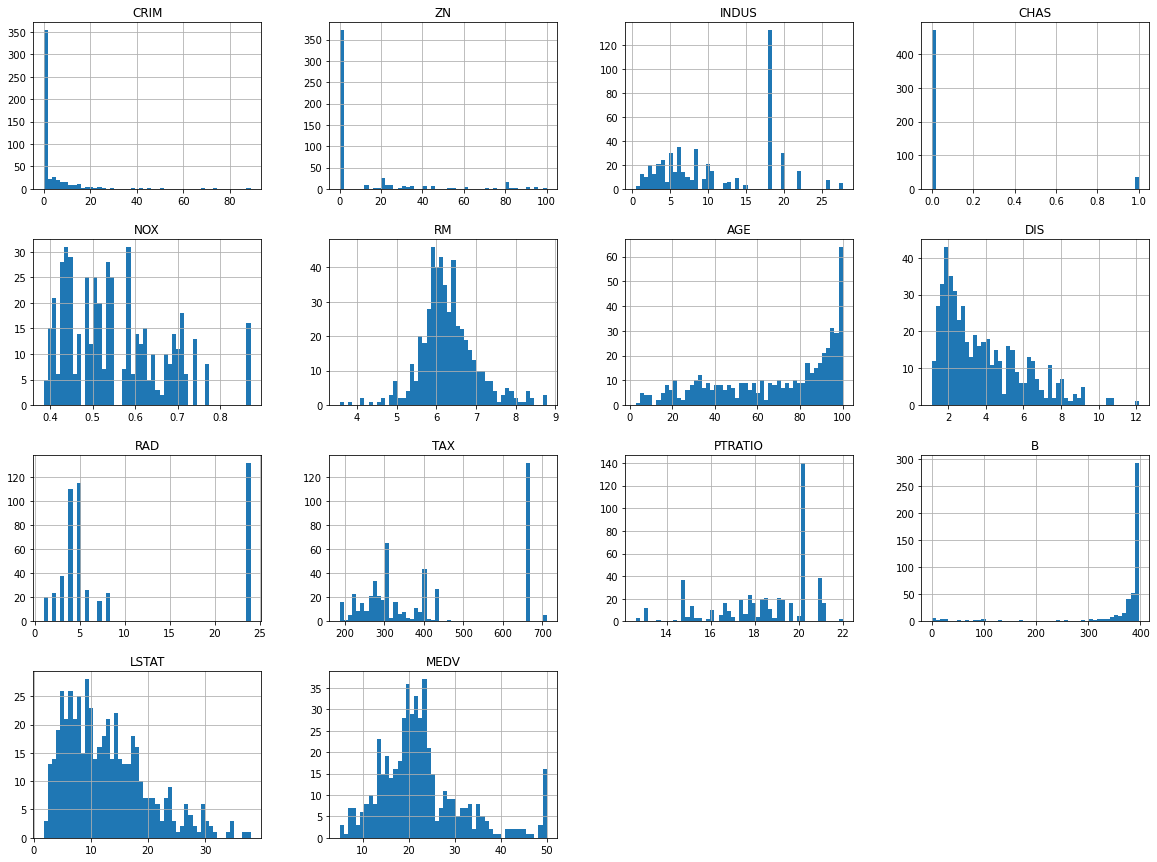

In [9]:
data.hist(bins= 50, figsize = (20,15))

### Splitting the data between training and testing

In [10]:
import numpy as np
np.random.seed(42)
def train_test_split(data, split_ratio):
    np.random.seed(42)
    shuffuled = np.random.permutation(len(data))
    test_set_size = int(len(data)*split_ratio)
    test_indices = shuffuled[:test_set_size]
    train_indices = shuffuled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = train_test_split(data, 0.2)

In [12]:
train_set.size
test_set.size

1414

* split_train_test also exists in sci-kit learn, which makes it easy to split data

In [13]:
from  sklearn.model_selection import train_test_split

In [14]:
train_set, test_set  = train_test_split(data, test_size=0.2, random_state=42)

### stratified train_test_split
* normal train_test_split is good, but it includes risk of not spreading attribute values equally
* Because of this, model can learn one value and totally ignore another so to solve this problem, we have stratified train_test_split


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(data, data['CHAS']):
    strat_train_set = data.loc[train_index]
    strat_test_set  = data.loc[test_index]

In [17]:
strat_train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [18]:
backup_train = strat_train_set.copy()
backup_test = strat_test_set.copy()
x_train = strat_train_set.drop("MEDV",axis=1)
y_train = strat_train_set.MEDV
x_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set.MEDV

### Looking for coorelation
* checking for positve and negative  correlation and elemenating features which do not contribute
* the coorelation values lie between -1 and 1 where 1 means high positive coorelation and -1 means strong negative coorelation

In [19]:
corr_matrix = data.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

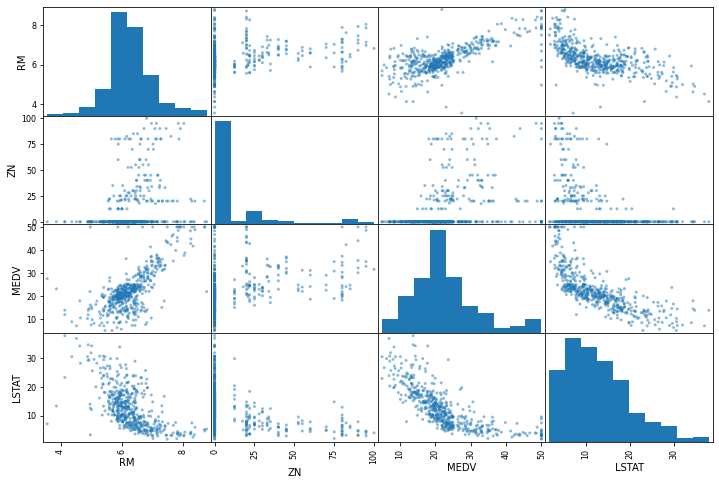

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["RM", "ZN", "MEDV", "LSTAT"]
scatter_matrix(data[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

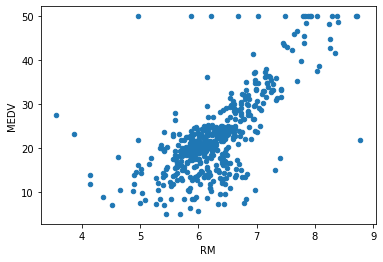

In [22]:
#to plot two specific attributes
data.plot(kind="scatter", x="RM", y="MEDV")

### Trying out attribute combinations

In [23]:
data.tax_per_room = data.TAX / data.RM

<ipython-input-23-64a45dca1714>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.tax_per_room = data.TAX / data.RM


In [24]:
housing

NameError: name 'housing' is not defined

### Dealing with missing attributes
* You have three options to deal with missing attributes 
  1. get rid of the missing data points
  2. get rid of the whole attribute
  3. set the value to 0, mean, median or mdode

In [ ]:
data.dropna(subset=["RM"])

In [ ]:
#option two
data.drop("RM", axis = 1)

In [ ]:
#option 3 : filling median in missing data points
data["RM"].fillna(data.RM.median())

In [ ]:
from sklearn.impute  import SimpleImputer

In [ ]:
#option 3 with sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_tr = imputer.fit(data)

### Scikit learn
* Primarily three types of objects
    1. Estimators - Estimates some parameters, eg: imputer. It has a fit and a transform method, fit method fits the dataset,   
    2. Transformers - Transformers takes input and then returns output based on the learning from fit() it also has a convinience function called fittransform()
    3. Predictors - linearRegression, k-nearest neighbour. fit() and .predict() and it also has score functions which evluates the results

### Feature scaling
* two types of feature scaling method:
    1. MinMax scaling (Normalization)  = (value-min)/(max-min)  | value will be between zero to one here
    2. Standardization = (value-mean)/standard deviation

### Creating piplelines
* Piplelines describes and models our ML production, they include how our data was processed, managed, and then trained
* Piplelines should be as continous as possible

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
myPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    #you can use as many methods as you want in the pipleline
    ('std_scalar', StandardScaler()),
])

In [ ]:
#pipeline takes numpy array or pandas dataframe as input, so we can't give it a simpleimputer as an input
myPipeline_tr = myPipeline.fit_transform(data)

In [ ]:
myPipeline_tr

### Training the model to our data
* Since we selected linear regression model, we are going to train our data based on it

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:

x_train = x_train.fillna(0)

In [30]:
myModel = LinearRegression()
myModel.fit(x_train, y_train)


LinearRegression()

In [33]:
predictions = myModel.predict(x_test)

In [32]:
y_test

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

In [41]:
n = 0
error = (y_test-predictions)**2/len(y_test)

In [34]:
len(y_test)

102

In [46]:
accuracy = 1- error.mean()
print(f"the accuracy of your model is {accuracy*100.}%")

the accuracy of your model is 82.27502561657901%


### Saving the model in a joblib file

In [47]:
!pip install joblib

You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [48]:
import joblib
joblib.dump(myModel, "dragon.joblib")

['dragon.joblib']

In [49]:
joblib.load("dragon.joblim")

FileNotFoundError: [Errno 2] No such file or directory: 'dragon.joblim'

### Testing the model